In [1]:
# Genetic algorithm for transforming random string to the fragment from Shakespeare's poem.
# String should be the same length

In [1]:
import random
import string
import numpy as np
from math import inf
import matplotlib.pyplot as plt

In [2]:
''' 
Kind of fitness function for this GA,
returns number of matching chars at current position.
It is obvious, that if this function returns 0, 
it means that str1 == str2
'''
def fitness(str1, str2):
    difference = 0
    for i in range(len(str1)):
        if str1[i] != str2[i]:
            difference += 1
    return difference

In [3]:
'''
Generate initial population
'''
def generate_random_string(length):
    return ''.join(random.choice(string.ascii_lowercase + ' ') for _ in range(length))

In [4]:
'''
Selection operator: takes whole population and returns n sentences,
(where n - population size) which are matching the most with the Shakespeare's string. 
'''
def selection(population, reference_sample, population_size=5):
    assert population.size >= population_size, "Population size is less than default population size!"
    new_population = []
    fitness_values = []
    errors_in_population = 0
    # Calculate fitness value for each sample
    for sample in population:
        fitness_values.append(fitness(sample, reference_sample))
    # Seach [population_size] best samples from the whole generation
    #print(fitness_values)
    for _ in range(population_size):
        best_sample_idx = np.argmin(fitness_values)
        new_population.append(population[best_sample_idx])
        errors_in_population += fitness_values[best_sample_idx]
        fitness_values[best_sample_idx] = inf
    return np.array(new_population), errors_in_population 

In [5]:
'''
Mutation operator: takes whole population and apllies mutations
with [p] probability [mutations_number] times for one parent.
Each mutation of parental string is an offspring.
Therefore this operator returns generation of 
size = population.size * mutations_number. This population
will be reduced in selection operator.
'''
def mutation(population, mutations_number=5, p=1):
    offspring_population = []
    for parent in population:
        for _ in range(mutations_number):
            # Roll the dice if this offspring will be mutated
            offspring = parent
            dice = np.random.uniform()
            if dice <= p:
                # If so, choose the position in this string to change
                pos = random.randint(0, len(offspring)-1)
                mutated_gene = random.choice(string.ascii_lowercase + ' ')
                offspring = offspring[:pos] + mutated_gene + offspring[pos+1:]
            offspring_population.append(offspring)
    return np.array(offspring_population)

In [9]:
# EVOLUTION !!1
generation_counter = 0
errors = []
ref = "genetic algorithm works"
pop_size = 5
survivors = np.array([generate_random_string(len(ref)) for _ in range(pop_size)])
print("Initial string: ", survivors)
error = inf
while ref not in survivors:
    population = mutation(survivors, mutations_number=100)
    generation_counter += 1
    survivors, error = selection(population, ref, population_size=pop_size)
    errors.append(error)
print("\nEvolved in {0} through {1} generations".format(survivors, generation_counter))

Initial string:  ['jeoxdtbpvh pvbphvnktayy' 'vvdifq hfxruoruqjslkzk '
 'lc  ryadc bgmdtn khnesl' 'bcydsj eunacuriuusltzpc'
 'gzstfhfsqmqpkrdxzzriizy']

Evolved in ['genetic algorithm works' 'genetic algorithm works'
 'genetic algorithm works' 'genetic llgorithm works'
 'genetic llgorithm works'] through 26 generations


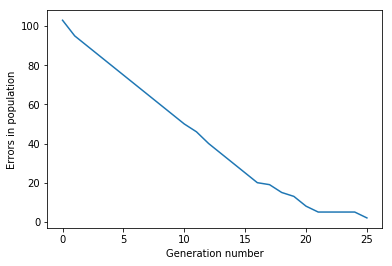

In [10]:
plt.plot(range(generation_counter), errors)
plt.ylabel('Errors in population')
plt.xlabel('Generation number')
plt.show()